# PIVpy getting started notebook:

This notebook shows an example of how one can use vecpy in order to load manipulate and display analyzed PIV data. 

### step 1 - import pivpy and dependencies

here we import the package code so that we can use it next 

In [51]:
import os, sys 
# sys.path.append(os.path.abspath('../'))

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

from pivpy import io, pivpy, graphics

# for the sake of this tutorial, ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

### step 2 - load the tests data

In order to load the data, first we need to set up the path to the data directory. Following that we need to get a list of files names that we would like to view/analyze. Finally we very quickly load the data in to a list of vec instances.

In [52]:
# pointer to the directory with the data
import importlib.resources as importlib_resources
path_to_data  = importlib_resources.files('pivpy') / 'data'
# list the directory
# os.listdir(path_to_data)

In [53]:
# let's read only the files from the Run* 
data = io.load_directory(path_to_data / 'Insight') # you can add also: basename='day2a*',ext='.vec')

found 5 files


In [54]:
# let's check if it's read:
data.attrs['files']

"[PosixPath('/home/user/Documents/repos/pivpy/pivpy/data/Insight/Run000001.T000.D000.P000.H001.L.vec'), PosixPath('/home/user/Documents/repos/pivpy/pivpy/data/Insight/Run000002.T000.D000.P000.H001.L.vec'), PosixPath('/home/user/Documents/repos/pivpy/pivpy/data/Insight/Run000003.T000.D000.P000.H001.L.vec'), PosixPath('/home/user/Documents/repos/pivpy/pivpy/data/Insight/Run000004.T000.D000.P000.H001.L.vec'), PosixPath('/home/user/Documents/repos/pivpy/pivpy/data/Insight/Run000005.T000.D000.P000.H001.L.vec')]"

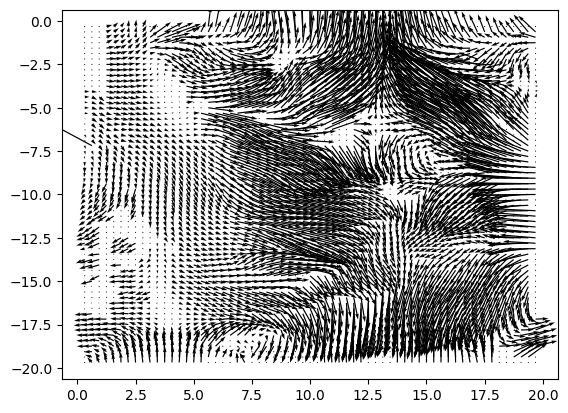

In [55]:
plt.quiver(data.x, data.y, data.u.isel(t=0), data.v.isel(t=0),scale=1)

### step 3 - plot some arrows

first things first - show a quiver plot

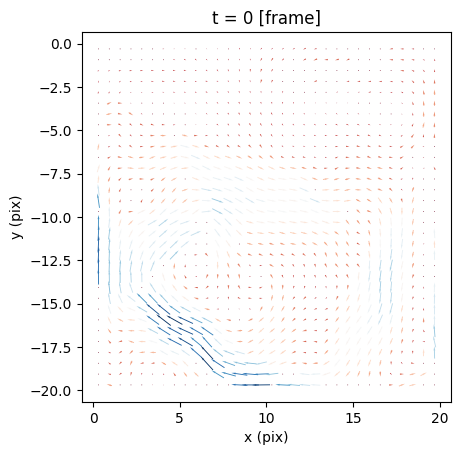

In [56]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=20, add_guide = False)

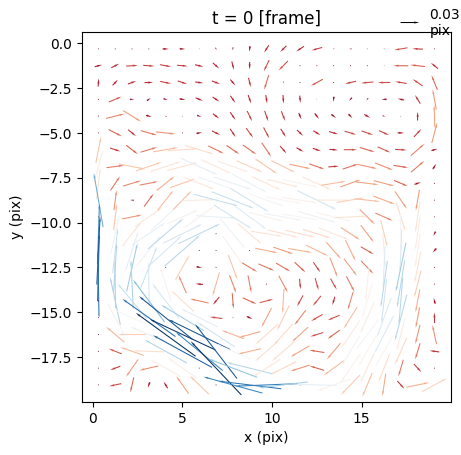

In [57]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=3, arrScale=5)

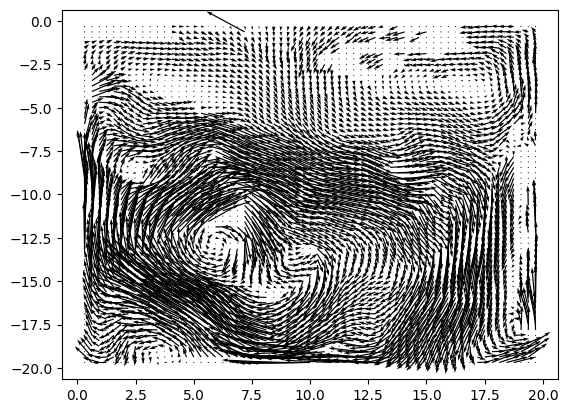

In [58]:
tmp = data.isel(t=0)
plt.quiver(tmp.x,tmp.y,tmp.u.T,tmp.v.T,scale=1)

In [59]:
# we can read also a single file only into a 1 frame dataset
d = io.load_vec(path_to_data / 'Insight'/ 'Run000001.T000.D000.P000.H001.L.vec' )

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 't = 1 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

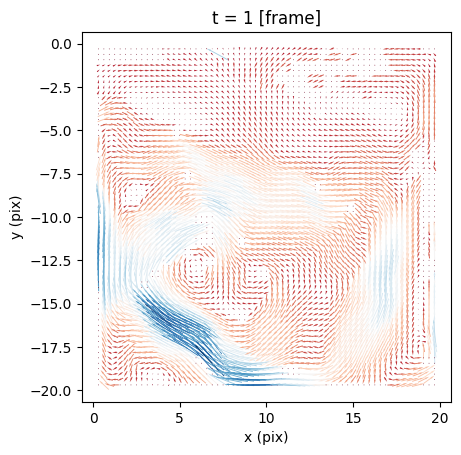

In [60]:
graphics.quiver(d.isel(t=0),arrScale=10, add_guide = False)

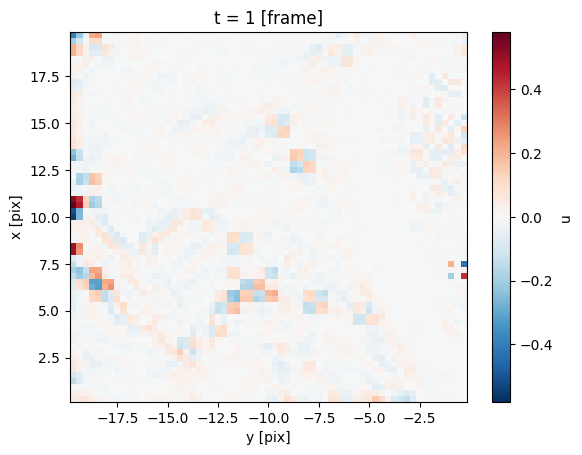

In [61]:
d.isel(t=0).differentiate(coord='x').differentiate(coord='y')['u'].plot.pcolormesh()

and a vorticity map

/home/user/Documents/repos/pivpy/pivpy/graphics.py:336: UserWarning: Warning: this function uses the first                frame, otherwise use: data.isel(t=N)
  warnings.warn(


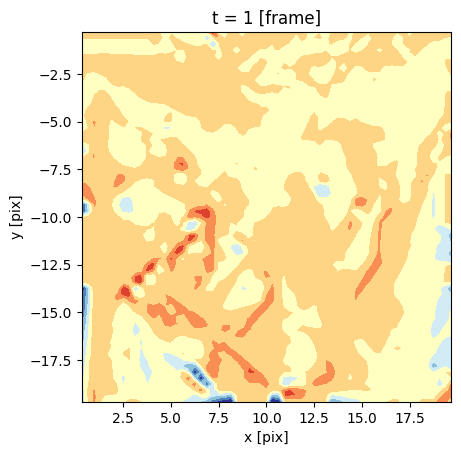

In [62]:
# prepare vorticity
d.piv.vec2scal('curl') # it will appear as d['w'] variable, 'w' for all scalar properties

# plot
fig, ax = graphics.contour_plot(d)

Also, velocity histograms in x and y directions

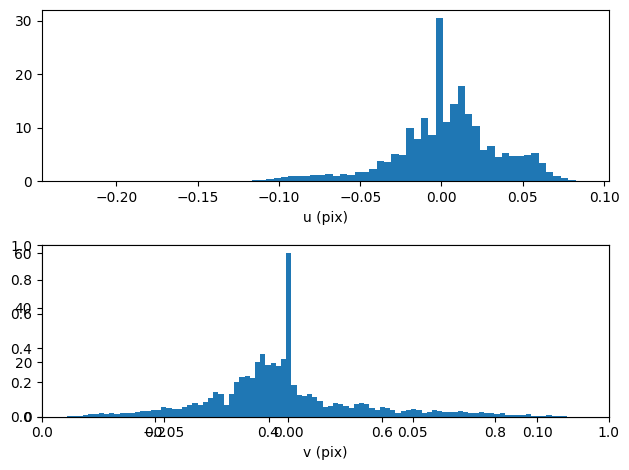

In [63]:
fig, ax = graphics.histogram(data, normed = True)

We can also plot a whole list of vec's as subplots:

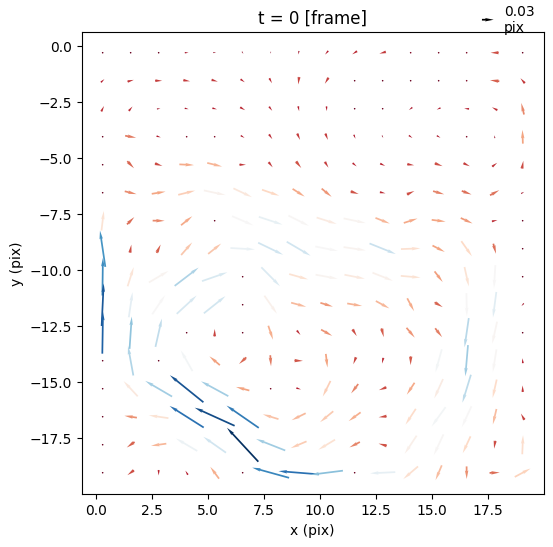

In [64]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=4, arrScale=10)
fig.set_size_inches(10, 6)

# Last but not least - manipulation

lets create a linear combinatino of our data and then see how to manipulate the coordinate system

__Addition and Scalar multiplication__

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 't = 4 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

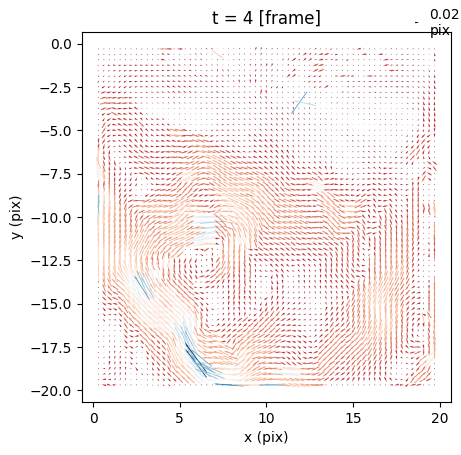

In [65]:
v = (data + 3*data - 2 * data.isel(t=0)) / 3.
graphics.quiver(v.isel(t=-1), arrScale=10)

__Crop__

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 't = 4 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

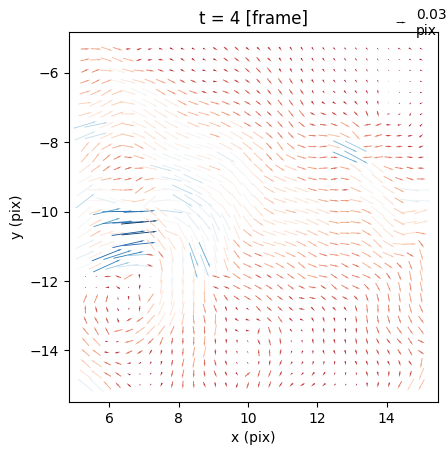

In [66]:
v = v.piv.crop([5,15,-5,-15])  #(xmin, xmax, ymin, ymax)
graphics.quiver(v.isel(t=-1), arrScale=10)

__Rotate__

In [67]:
# v.piv.rotate(90) # not implemented

__Translation of Coordinate System__

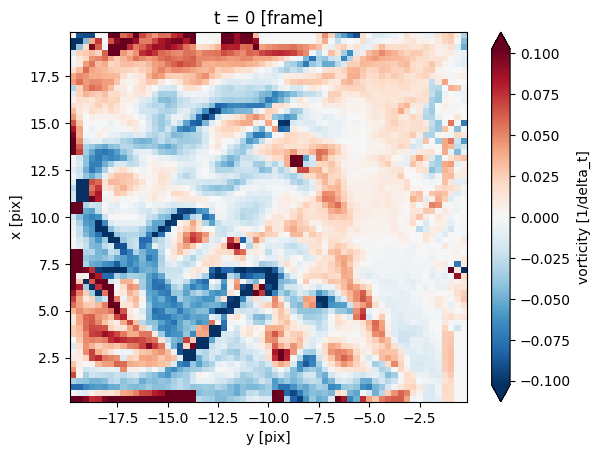

In [68]:
# we can also use some default plot from xarray
data.piv.vorticity()
data.isel(t=0)['w'].plot(robust=True)

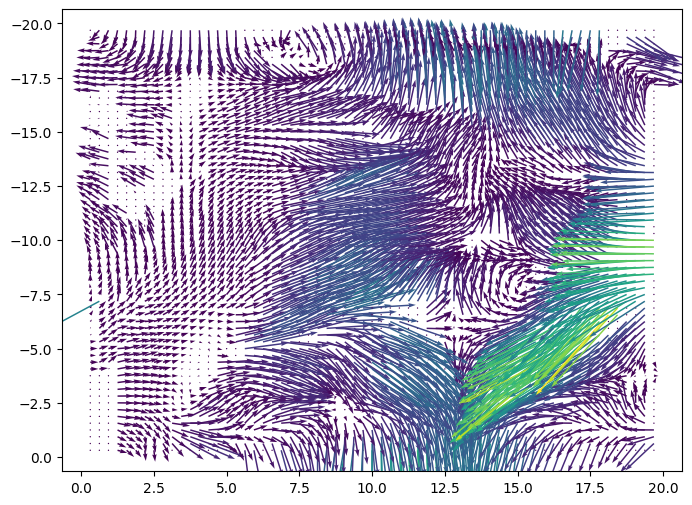

In [69]:
# low level quiver
plt.figure(figsize=(8,6))
plt.quiver(data.x,data.y,data.u[:,:,0], -data.v[:,:,0] ,data.u[:,:,0]**2 + data.v[:,:,0]**2,scale=.75)
plt.gca().invert_yaxis()

In [70]:
test = io.create_sample_field(rows=25,cols=5)

/home/user/Documents/repos/pivpy/pivpy/graphics.py:336: UserWarning: Warning: this function uses the first                frame, otherwise use: data.isel(t=N)
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 't = 0 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

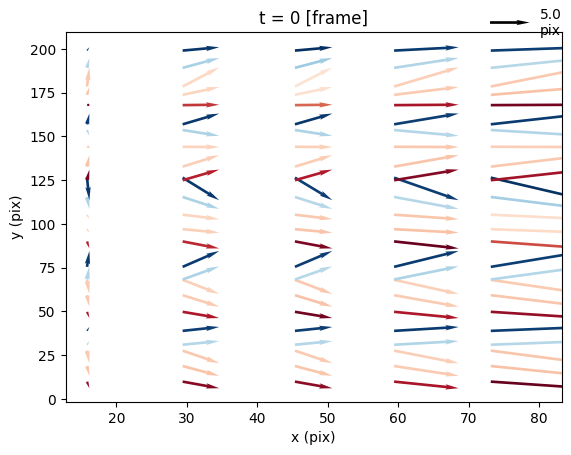

In [71]:
graphics.quiver(test,arrScale=5,aspectratio='auto')

In [72]:
data = io.load_vec(path_to_data / 'openpiv_vec' / 'exp1_001_b.vec')

In [73]:
variables,units,rows,cols, dt, frame, method = io.parse_header(path_to_data / 'openpiv_vec' / 'exp1_001_b.vec')
variables,units,rows,cols, dt, frame, method

(['x', 'y', 'u', 'v'],
 ['pix', 'pix', 'pix', 'pix'],
 None,
 None,
 None,
 1,
 <function pivpy.io.load_openpiv_txt(filename: str, rows: int = None, cols: int = None, delta_t: float = None, frame: int = 0) -> xarray.core.dataset.Dataset>)

/home/user/Documents/repos/pivpy/pivpy/graphics.py:336: UserWarning: Warning: this function uses the first                frame, otherwise use: data.isel(t=N)
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 't = 1 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

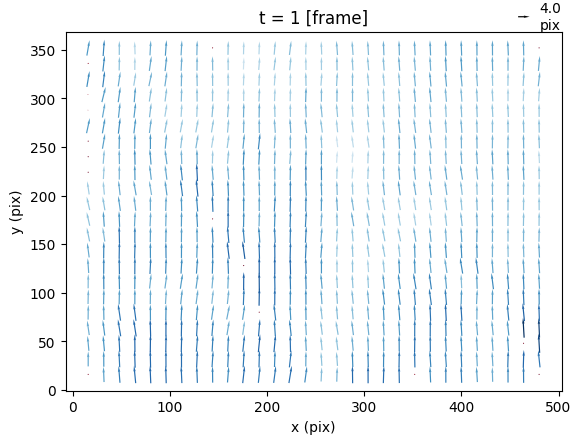

In [74]:
data.piv.quiver()

In [75]:
data = io.load_directory(path_to_data / 'urban_canopy', ext='.vc7')
# vc7 files are for some reason need transpose
data['u'] = data['u'].transpose()
data['v'] = data['v'].transpose()

found 5 files


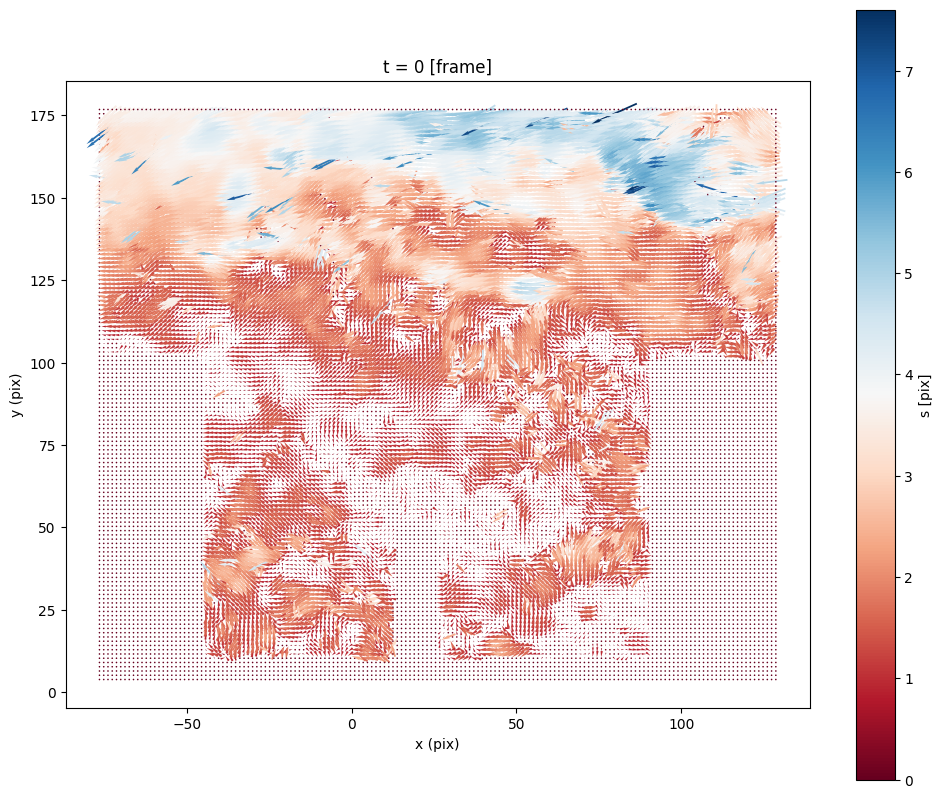

In [76]:
data.isel(t=0).piv.quiver(arrScale=15,colorbar=True)
plt.gcf().set_size_inches(12,10)
#plt.gca().invert_yaxis()

In [77]:
%pip install pyarrow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
%time
df = data.to_dataframe()
try:
    df.to_parquet('tmp.pq')
    print('Wrote tmp.pq')
except ImportError as e:
    print('Parquet engine not installed; skipping to_parquet:', e)


CPU times: user 12 μs, sys: 1 μs, total: 13 μs
Wall time: 28.4 μs


In [79]:
%pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [80]:
%time
data.to_netcdf('tmp.nc')

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 11 μs


In [81]:
tmp = xr.load_dataset('tmp.nc')
assert (tmp == data)

In [82]:
ds = xr.Dataset.from_dataframe(df)
df.head(), ds.head()

(                           u    v    chc
 t x          y                          
 0 -76.450151 176.755851  0.0  0.0   True
              175.465554  0.0  0.0   True
              174.175256  0.0  0.0   True
              172.884958  0.0  0.0  False
              171.594661  0.0  0.0  False,
 <xarray.Dataset> Size: 1kB
 Dimensions:  (t: 5, x: 5, y: 5)
 Coordinates:
   * t        (t) int64 40B 0 1 2 3 4
   * x        (x) float64 40B -76.45 -75.16 -73.87 -72.58 -71.29
   * y        (y) float64 40B 176.8 175.5 174.2 172.9 171.6
 Data variables:
     u        (t, x, y) float32 500B 0.0 0.0 0.0 0.0 ... -2.317 -2.523 -2.69
     v        (t, x, y) float32 500B 0.0 0.0 0.0 0.0 ... 0.2161 0.2568 0.297
     chc      (t, x, y) bool 125B True True True False ... False False False)